# Preparação dos dados

In [ ]:
# Lendo drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# bibliotecas necessárias
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics  import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

## Lendo dados 

In [ ]:
# dados em pasta 
pasta = '/content/drive/My Drive/DEV_PESQUISA/'

In [ ]:
# lendo dados
dados = pd.read_excel(pasta + 'base-completa_no_nulls.xlsx')

In [ ]:
dados.head()

,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,ID_SERIE,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,Código da Escola,Nome da Escola,IDEB2019
0,2704302.0,1.0,27034755.0,3.0,1.0,1176869.0,2.019198e+09,5.0,1.0,A,...,D,F,F,F,F,E,E,27034755.0,ESCOLA MUNICIPAL DOUTOR HENRIQUE EQUELMAN,6.1
1,2704302.0,1.0,27035441.0,3.0,1.0,1157326.0,2.019085e+09,5.0,1.0,A,...,F,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5
2,2704302.0,1.0,27035441.0,3.0,1.0,1180766.0,2.019085e+09,5.0,1.0,NaN,...,E,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5
3,2704302.0,1.0,27036049.0,3.0,1.0,1014439.0,2.019085e+09,5.0,1.0,A,...,F,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3
4,2704302.0,1.0,27036049.0,3.0,1.0,1169049.0,2.019116e+09,5.0,1.0,A,...,E,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3


In [ ]:
dados.describe()

,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,ID_SERIE,IN_PREENCHIMENTO_QUESTIONARIO,Código da Escola,IDEB2019
count,342.0,342.0,3.420000e+02,342.0,342.000000,3.420000e+02,3.420000e+02,342.000000,342.000000,3.500000e+02,350.000000
mean,2704302.0,1.0,2.712132e+07,3.0,1.002924,1.097178e+06,2.019154e+09,5.982456,0.859649,2.712103e+07,5.151087
std,0.0,0.0,9.339523e+04,0.0,0.054074,7.277207e+04,7.761257e+04,1.724325,0.347860,9.340028e+04,0.621141
min,2704302.0,1.0,2.703476e+07,3.0,1.000000,9.754650e+05,2.019010e+09,5.000000,0.000000,2.703476e+07,3.700000
25%,2704302.0,1.0,2.703624e+07,3.0,1.000000,1.037518e+06,2.019090e+09,5.000000,1.000000,2.703624e+07,4.800000
50%,2704302.0,1.0,2.703786e+07,3.0,1.000000,1.095736e+06,2.019178e+09,5.000000,1.000000,2.703786e+07,5.151087
75%,2704302.0,1.0,2.722423e+07,3.0,1.000000,1.157327e+06,2.019218e+09,5.000000,1.000000,2.722466e+07,5.600000
max,2704302.0,1.0,2.724061e+07,3.0,2.000000,1.219431e+06,2.019265e+09,9.000000,1.000000,2.724061e+07,6.900000


In [ ]:
#from pandas_profiling import ProfileReport - Gerar relatorio automatico
#dados.profile_report()


In [ ]:
df_sobre_questoes = pd.read_excel(pasta + 'Consulta-descricao-questoes.xlsx')

In [ ]:
df_sobre_questoes.head()

,Código,cod,Descrição (texto da pergunta)
0,2.0,TX_RESP_Q001,Qual é a sua cor ou raça?
1,3.0,TX_RESP_Q002,Há quantos anos você trabalha como professor (a)?
2,4.0,TX_RESP_Q003,Há quantos anos você trabalha como professor(a...
3,5.0,TX_RESP_Q004,Em quantas escolas você trabalha?
4,6.0,TX_RESP_Q005,Qual o seu tipo de vínculo trabalhista nesta e...


## Criando função para coleta de informações sobre questões 

In [ ]:
# lendo dataframe com informacoes das questoes 
descricao_questoes_respostas = pd.read_csv(pasta + 'dicionario_questoes_respostas.csv')
descricao_questoes_respostas.head()

,questão,descrição,A,B,C,D,E,F,G
0,TX_RESP_Q001,Qual é a sua cor ou raça?,Branca.,Preta.,Parda.,Amarela.,Indígena.,Não quero declarar.,NaN
1,TX_RESP_Q002,Há quantos anos você trabalha como professor (a)?,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.
2,TX_RESP_Q003,Há quantos anos você trabalha como professor(a...,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.
3,TX_RESP_Q004,Em quantas escolas você trabalha?,Apenas nesta.,Em 2.,Em 3.,Em 4 ou mais.,NaN,NaN,NaN
4,TX_RESP_Q005,Qual o seu tipo de vínculo trabalhista nesta e...,Concursado/efetivo/estável.,Contrato temporário.,Contrato terceirizado.,Contrato CLT.,Pessoa jurídica.,Outra situação trabalhista.,NaN


In [ ]:
# funcao para obter texto da questao
def pegar_informacoes_questao(questao):
  try :
    informacoes = descricao_questoes_respostas[descricao_questoes_respostas['questão'] == questao]
  except NameError as e:
    raise NameError('Dataframe não encontrado')
  return informacoes

In [ ]:
# exemplo de uso da função
pegar_informacoes_questao('TX_RESP_Q003')

,questão,descrição,A,B,C,D,E,F,G
2,TX_RESP_Q003,Há quantos anos você trabalha como professor(a...,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.


## Criando dataframe para classificação

Nesta etapa será criado duas classes para separar os resultados obtidos do IDEB


*   satisfatório
    * Se o ideb for maior ou igual a 6.
*   não satisfatório
    * Se o ideb for menor que 6.

Essas classes serão importantes para a construção dos algoritmos e pra análise de dados.



In [ ]:
dados.head()

,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,ID_SERIE,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,Código da Escola,Nome da Escola,IDEB2019
0,2704302.0,1.0,27034755.0,3.0,1.0,1176869.0,2.019198e+09,5.0,1.0,A,...,D,F,F,F,F,E,E,27034755.0,ESCOLA MUNICIPAL DOUTOR HENRIQUE EQUELMAN,6.1
1,2704302.0,1.0,27035441.0,3.0,1.0,1157326.0,2.019085e+09,5.0,1.0,A,...,F,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5
2,2704302.0,1.0,27035441.0,3.0,1.0,1180766.0,2.019085e+09,5.0,1.0,NaN,...,E,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5
3,2704302.0,1.0,27036049.0,3.0,1.0,1014439.0,2.019085e+09,5.0,1.0,A,...,F,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3
4,2704302.0,1.0,27036049.0,3.0,1.0,1169049.0,2.019116e+09,5.0,1.0,A,...,E,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3


In [ ]:
ideb_classes = []
for valor in dados['IDEB2019']:
  if valor >= 6:
    ideb_classes.append('satisfatório')
  else:
    ideb_classes.append('não satisfatório')
dados['classe'] = ideb_classes

In [ ]:
dados.head()

,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,ID_SERIE,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,Código da Escola,Nome da Escola,IDEB2019,classe
0,2704302.0,1.0,27034755.0,3.0,1.0,1176869.0,2.019198e+09,5.0,1.0,A,...,F,F,F,F,E,E,27034755.0,ESCOLA MUNICIPAL DOUTOR HENRIQUE EQUELMAN,6.1,satisfatório
1,2704302.0,1.0,27035441.0,3.0,1.0,1157326.0,2.019085e+09,5.0,1.0,A,...,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5,não satisfatório
2,2704302.0,1.0,27035441.0,3.0,1.0,1180766.0,2.019085e+09,5.0,1.0,NaN,...,F,F,F,F,F,F,27035441.0,ESCOLA DE ENSINO FUNDAMENTAL SAGRADO CORACAO D...,4.5,não satisfatório
3,2704302.0,1.0,27036049.0,3.0,1.0,1014439.0,2.019085e+09,5.0,1.0,A,...,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3,satisfatório
4,2704302.0,1.0,27036049.0,3.0,1.0,1169049.0,2.019116e+09,5.0,1.0,A,...,F,F,F,E,E,E,27036049.0,ESCOLA MUNICIPAL ZANELI CALDAS,6.3,satisfatório


## Tratando dados

In [ ]:
# deixando apenas colunas uteis para analise de dados
dados_filtrados = dados.drop(columns=['ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 
                                      'ID_TURMA', 'CO_PROFESSOR', 'IN_PREENCHIMENTO_QUESTIONARIO', 'Código da Escola',
                                      'Código da Escola', 'Nome da Escola'])
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,A,G,F,B,A,C,B,B,...,E,D,F,F,F,F,E,E,6.1,satisfatório
1,1.0,5.0,A,F,D,A,A,C,B,C,...,F,F,F,F,F,F,F,F,4.5,não satisfatório
2,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,E,E,F,F,F,F,F,F,4.5,não satisfatório
3,1.0,5.0,A,E,E,A,A,D,B,C,...,E,F,F,F,F,E,E,E,6.3,satisfatório
4,1.0,5.0,A,G,G,A,A,D,B,B,...,E,E,F,F,F,E,E,E,6.3,satisfatório


### Transformando dados categoricos em numericos

In [ ]:
# script para ver todos os dados categoricos que aparecem nas colunas das questoes 
# Obs: existem valores nan nos dados

dados_categoricos = []
for coluna in dados_filtrados.columns:
  if coluna not in ['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe']:
    for dado in dados_filtrados[coluna]:
      if dado not in dados_categoricos:
        dados_categoricos.append(dado)
dados_categoricos

['A', nan, 'C', 'B', 'D', 'F', 'G', 'E']

In [ ]:
type(dados_categoricos[1])

float

In [ ]:
# organizando valores de dados_categoricos
dados_categoricos.pop(1) # removendo nan
dados_categoricos.sort() # ordenando valores

In [ ]:
# mostrando a representacao dos valores categoricos em numericos 
dados_numericos = list(range(len(dados_categoricos)))
for c in range(len(dados_categoricos)):
    print(dados_categoricos[c], '=', dados_numericos[c])

A = 0
B = 1
C = 2
D = 3
E = 4
F = 5
G = 6


In [ ]:
# trocando o tipo do atributo diagnostico por um tipo numerico
for coluna in dados_filtrados.columns:
  if coluna not in ['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019']:
    dados_filtrados[coluna] = dados_filtrados[coluna].replace(dados_categoricos, dados_numericos)
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,...,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4,6.1,satisfatório
1,1.0,5.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.5,não satisfatório
2,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5,4.5,não satisfatório
3,1.0,5.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,...,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4,6.3,satisfatório
4,1.0,5.0,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4,6.3,satisfatório


In [ ]:
# transformando classe categórica em numérica
dados_filtrados['classe'] = dados_filtrados['classe'].replace(['satisfatório', 'não satisfatório'], [1, 0])
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,...,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4,6.1,1
1,1.0,5.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
2,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
3,1.0,5.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,...,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
4,1.0,5.0,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1


### Tratando valores nan

In [ ]:
# checando se existem valores vazios nas colunas do dataset
dados_filtrados.isna().any()

ID_LOCALIZACAO     True
ID_SERIE           True
TX_RESP_Q001       True
TX_RESP_Q002       True
TX_RESP_Q003       True
                  ...  
TX_RESP_Q126       True
TX_RESP_Q127       True
TX_RESP_Q128      False
IDEB2019          False
classe            False
Length: 132, dtype: bool

In [ ]:
# quantas linhas e colunas existem antes de remover nan dados
print('Linhas: ', dados_filtrados.shape[0])
print('Colunas: ', dados_filtrados.shape[1])

Linhas:  350
Colunas:  132


In [ ]:
# antes de remover, guardando valores nan para analise
nan_values = dados_filtrados[dados_filtrados.isna().any(axis=1)]

In [ ]:
# removendo linhas com dados nan
dados_filtrados = dados_filtrados.dropna(how='any',axis=0) 

In [ ]:
# quantas linhas e colunas existem após remover nan dados
print('Linhas: ', dados_filtrados.shape[0])
print('Colunas: ', dados_filtrados.shape[1])

Linhas:  192
Colunas:  132


### Analisando instâncias com valores nan

In [ ]:
# mostrando instâncias com nan
nan_values.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
2,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
8,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4.4,0
10,1.0,5.0,1.0,6.0,4.0,1.0,0.0,3.0,2.0,3.0,...,3.0,2.0,5.0,2.0,5.0,1.0,0.0,5,4.4,0
11,1.0,5.0,2.0,6.0,2.0,1.0,0.0,2.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5.0,0
18,1.0,5.0,1.0,6.0,6.0,0.0,0.0,1.0,0.0,1.0,...,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4,5.9,0


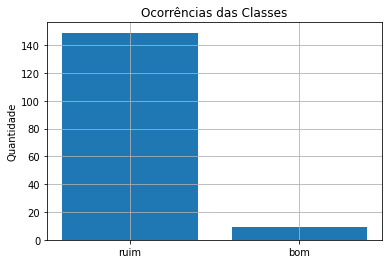

ruim: 149 | bom: 9


In [ ]:
# verificando balanceamento de classe de nan 

classes = nan_values.groupby(by=['classe'])['classe'].count()

plt.bar(['ruim', 'bom'], [classes[0], classes[1]])
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

print('ruim: {} | bom: {}'.format(classes[0], classes[1]))


### Observações sobre tratamento de dados

Foram 158 instâncias apagas ao remover valores nan, quase a metáde do número de instâncias do dataframe. Tendo isso em vista, é recomendável fazer testes com outros métodos para remover os valores nan e manter as instâncias, para que assim seja possível observar como os modelos de previsão irão se comportar com ao utilizar a outra parte dos dados. 

## Criando dataframe para contagem de ocorrências em questões

O dataframe criado nessa secção terá a ocorrência de vezes que cada alternativa foi marcada em cada questão.

In [ ]:
# gera novo dataframe com as colunas mas nenhuma instância
colunas = ['questão', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
questoes_contagem = pd.DataFrame(columns=colunas)

# variável para comparação entre numero e letra 
categoricos = { c:valor for c, valor in enumerate(colunas[1:])}

# percorre todas as questões no dataset dados_filtrados
for coluna in dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019']):
  
  # prepara nova linha que será adicionada ao dataframe criado
  nova_linha = { c:0 for c in colunas}
  nova_linha['questão'] = coluna

  # conta a ocorrência de vezes que certa letra apareceu para certa questão
  contagem = { c:0 for c in range(7) }
  for valor in dados_filtrados[coluna]:
    contagem[valor] += 1
  
  # percorre dicionário com contagem e transforma os valores e passa para a variável nova_linha
  for chave_numerica in contagem:

    chave_categorica = categoricos[chave_numerica]
    valor = contagem[chave_numerica]

    nova_linha[chave_categorica] = valor
  
  # adiciona nova linha ao dataframe criado
  questoes_contagem = questoes_contagem.append(nova_linha, ignore_index=True)

In [ ]:
# dataframe gerado
questoes_contagem

,questão,A,B,C,D,E,F,G
0,TX_RESP_Q001,60,23,106,3,0,0,0
1,TX_RESP_Q002,7,8,9,29,38,36,65
2,TX_RESP_Q003,11,18,21,37,47,24,34
3,TX_RESP_Q004,85,95,10,2,0,0,0
4,TX_RESP_Q005,179,12,0,0,0,1,0
...,...,...,...,...,...,...,...,...
124,TX_RESP_Q125,0,0,1,2,73,116,0
125,TX_RESP_Q126,3,0,8,34,101,46,0
126,TX_RESP_Q127,0,0,0,12,87,93,0
127,TX_RESP_Q128,0,0,2,24,102,64,0


# Técnicas de Seleção de Features

In [ ]:
# variável que guardará as questoes escolhidas pelas técnicas de seleção
questoes_selecionadas = []

## Analisando Correlação

### Ánalise de correlação

In [ ]:
# tabela de correlação
dados_filtrados.corr()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
ID_LOCALIZACAO,1.000000,-0.012996,0.057102,0.028580,0.059991,-0.072126,-0.014900,-0.021749,0.034517,0.058103,...,-0.114994,-0.085536,-0.085161,-0.077153,-0.077694,-0.072963,-0.169392,-0.126027,-0.148099,-0.024674
ID_SERIE,-0.012996,1.000000,0.141738,0.052781,0.131707,0.105052,-0.036986,-0.251416,0.262562,0.069180,...,-0.169817,-0.144713,0.129674,0.133887,0.137751,0.214037,0.170958,-0.137203,-0.191227,-0.061245
TX_RESP_Q001,0.057102,0.141738,1.000000,0.047380,0.145840,-0.024704,-0.034141,-0.050926,0.048228,-0.132038,...,-0.019504,-0.072801,0.051067,0.106167,0.100300,0.088878,0.046984,0.117815,-0.018534,-0.007689
TX_RESP_Q002,0.028580,0.052781,0.047380,1.000000,0.037520,-0.091084,-0.058296,0.061411,0.016970,0.007612,...,0.148685,0.060157,0.062849,0.100573,0.016965,0.064596,0.029834,-0.076762,0.198131,0.124345
TX_RESP_Q003,0.059991,0.131707,0.145840,0.037520,1.000000,-0.110934,-0.045067,-0.002493,-0.024089,0.002052,...,0.233805,0.030366,-0.013173,0.038100,0.003214,0.131427,0.043659,-0.000274,-0.189862,0.018167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TX_RESP_Q126,-0.072963,0.214037,0.088878,0.064596,0.131427,0.172937,0.018877,0.065342,0.125547,0.149016,...,0.311657,0.030731,0.347245,0.429906,0.467545,1.000000,0.440997,0.327731,-0.041079,-0.043763
TX_RESP_Q127,-0.169392,0.170958,0.046984,0.029834,0.043659,0.067182,0.036460,-0.024965,0.141327,-0.065668,...,0.030534,0.127848,0.452642,0.471177,0.595868,0.440997,1.000000,0.412698,-0.018304,-0.068425
TX_RESP_Q128,-0.126027,-0.137203,0.117815,-0.076762,-0.000274,0.052108,-0.021098,0.055895,-0.071943,0.010174,...,0.116180,0.045826,0.285593,0.412606,0.421845,0.327731,0.412698,1.000000,0.015567,-0.043763
IDEB2019,-0.148099,-0.191227,-0.018534,0.198131,-0.189862,-0.003893,-0.078519,0.105983,-0.020242,-0.071768,...,-0.008065,0.130544,0.044432,0.098577,0.024551,-0.041079,-0.018304,0.015567,1.000000,0.576183


In [ ]:
# Vendo se existem valores nan na correlação
dados_filtrados.corr().isna().any()

ID_LOCALIZACAO    True
ID_SERIE          True
TX_RESP_Q001      True
TX_RESP_Q002      True
TX_RESP_Q003      True
                  ... 
TX_RESP_Q126      True
TX_RESP_Q127      True
TX_RESP_Q128      True
IDEB2019          True
classe            True
Length: 132, dtype: bool

**Sobre valores nan na correlação**

A forma que se é cálculado os coeficientes de correlação abre margem para a possibildade de divisão por 0, tendo isso em mente o valor retornado para superar esse problema é o valor nan.

O valor nan pode ser interpretado como: Não existem correlação entre as variáveis analisádas.

Fontes: 
  * https://www.mathworks.com/matlabcentral/answers/506464-getting-a-nan-in-correlation-coefficient

In [ ]:
# correlacoes apenas das questões com o valor do ideb
correlacoes_ideb = dados_filtrados[dados_filtrados.columns[3:]]
correlacoes_ideb = correlacoes_ideb.drop(columns=['classe']).corr()['IDEB2019']
correlacoes_ideb

TX_RESP_Q002    0.198131
TX_RESP_Q003   -0.189862
TX_RESP_Q004   -0.003893
TX_RESP_Q005   -0.078519
TX_RESP_Q006    0.105983
                  ...   
TX_RESP_Q125    0.024551
TX_RESP_Q126   -0.041079
TX_RESP_Q127   -0.018304
TX_RESP_Q128    0.015567
IDEB2019        1.000000
Name: IDEB2019, Length: 128, dtype: float64

In [ ]:
# mostrando colunas com nan e as substituindo por 0
print('Correlações nan:')
print()
c = 0
for valor in correlacoes_ideb.isna():
  if valor is True:
    print(correlacoes_ideb.index[c], '-', 'nan')
    correlacoes_ideb[correlacoes_ideb.index[c]] = 0
    print(correlacoes_ideb.index[c], '-', correlacoes_ideb[correlacoes_ideb.index[c]])
    print()
  c += 1

Correlações nan:

TX_RESP_Q100 - nan
TX_RESP_Q100 - 0.0

TX_RESP_Q106 - nan
TX_RESP_Q106 - 0.0



In [ ]:
# ordenando correlacao
correlacoes_ideb = correlacoes_ideb.sort_values(ascending=False)
correlacoes_ideb

IDEB2019        1.000000
TX_RESP_Q002    0.198131
TX_RESP_Q037    0.159338
TX_RESP_Q098    0.145883
TX_RESP_Q060    0.140370
                  ...   
TX_RESP_Q024   -0.106555
TX_RESP_Q072   -0.108165
TX_RESP_Q101   -0.117424
TX_RESP_Q029   -0.133346
TX_RESP_Q003   -0.189862
Name: IDEB2019, Length: 128, dtype: float64

Os 20 com correlação mais forte (menos a coluna do ideb consigo mesma):
Index(['TX_RESP_Q002', 'TX_RESP_Q037', 'TX_RESP_Q098', 'TX_RESP_Q060',
       'TX_RESP_Q092', 'TX_RESP_Q097', 'TX_RESP_Q122', 'TX_RESP_Q034',
       'TX_RESP_Q019', 'TX_RESP_Q085', 'TX_RESP_Q028', 'TX_RESP_Q095',
       'TX_RESP_Q111', 'TX_RESP_Q091', 'TX_RESP_Q006', 'TX_RESP_Q120',
       'TX_RESP_Q036', 'TX_RESP_Q087', 'TX_RESP_Q124', 'TX_RESP_Q058'],
      dtype='object')


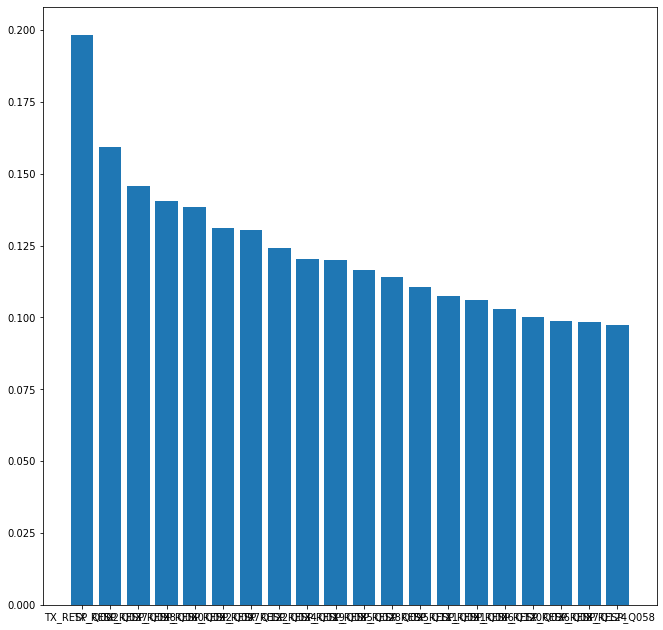

In [ ]:
# mostrando os 20 com correlação mais forte
print('Os 20 com correlação mais forte (menos a coluna do ideb consigo mesma):')
print(correlacoes_ideb.index[1:21])
plt.rcParams["figure.figsize"] = (11, 11)
plt.bar(correlacoes_ideb.index[1:21], correlacoes_ideb.values[1:21])
plt.show()

Os 20 com correlação mais fraca ou inversa:
Index(['TX_RESP_Q003', 'TX_RESP_Q029', 'TX_RESP_Q101', 'TX_RESP_Q072',
       'TX_RESP_Q024', 'TX_RESP_Q023', 'TX_RESP_Q043', 'TX_RESP_Q113',
       'TX_RESP_Q005', 'TX_RESP_Q109', 'TX_RESP_Q047', 'TX_RESP_Q009',
       'TX_RESP_Q008', 'TX_RESP_Q093', 'TX_RESP_Q053', 'TX_RESP_Q044',
       'TX_RESP_Q042', 'TX_RESP_Q112', 'TX_RESP_Q014', 'TX_RESP_Q011'],
      dtype='object')


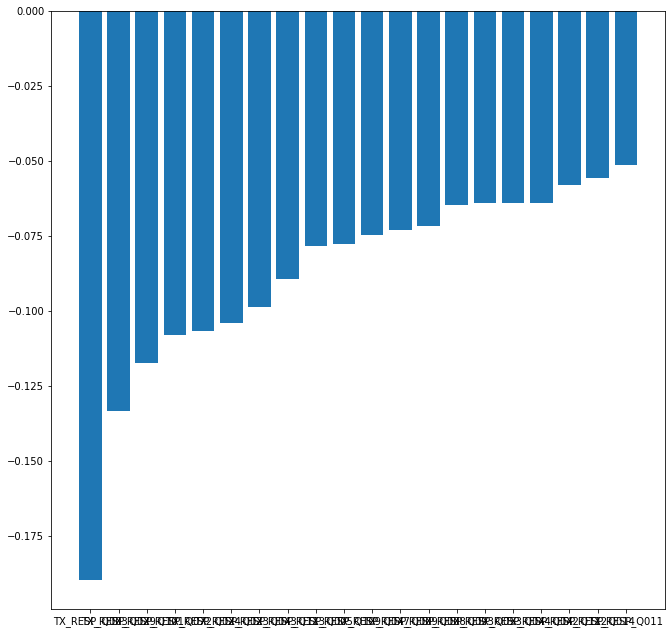

In [ ]:
# mostrando os 20 com correlação mais fraca ou inversa
print('Os 20 com correlação mais fraca ou inversa:')
print(correlacoes_ideb.index[-1:-21:-1])
plt.rcParams["figure.figsize"] = (11, 11)
plt.bar(correlacoes_ideb.index[-1:-21:-1], correlacoes_ideb.values[-1:-21:-1])
plt.show()

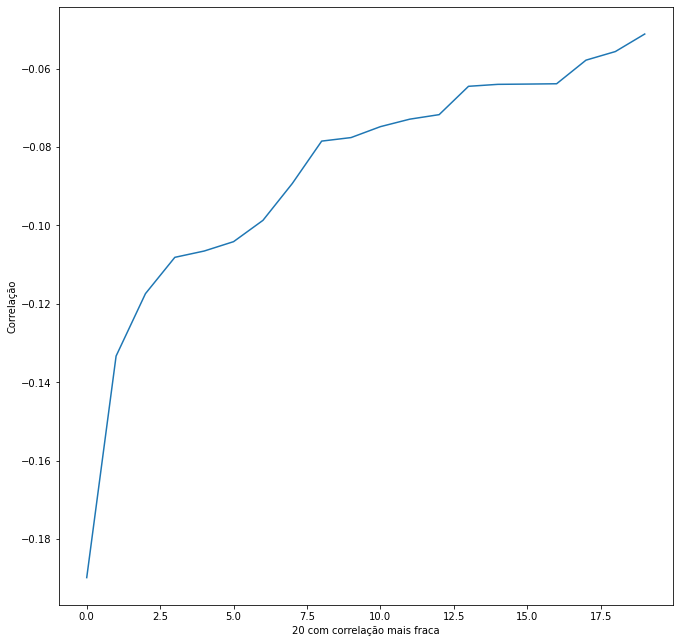

In [ ]:
plt.plot(correlacoes_ideb.values[-1:-21:-1])
plt.ylabel('Correlação')
plt.xlabel('20 com correlação mais fraca')
plt.show()

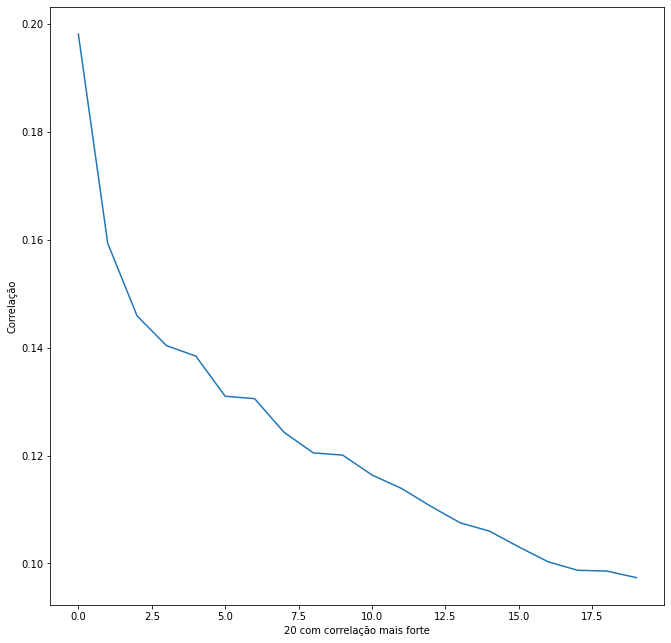

In [ ]:
plt.plot(correlacoes_ideb.values[1:21])
plt.ylabel('Correlação')
plt.xlabel('20 com correlação mais forte')
plt.show()

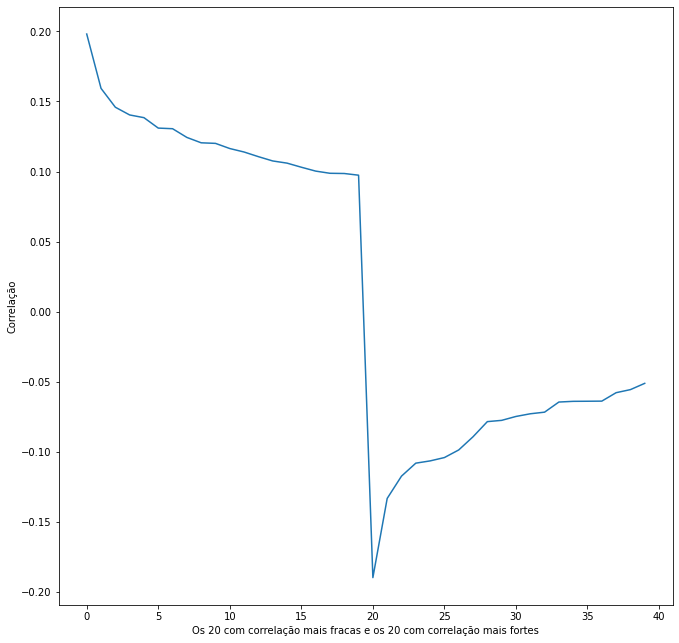

In [ ]:
# plotando gráfico dos 20 com correlação mais forte e dos 20 com correlação mais fraca
plt.plot(list(correlacoes_ideb.values[1:21]) + list(correlacoes_ideb.values[-1:-21:-1]))
plt.ylabel('Correlação')
plt.xlabel('Os 20 com correlação mais fracas e os 20 com correlação mais fortes')
plt.show()

### Conclusão da análise de correlação

O critério para a seleção de uma coluna para a criação dos modelo será pela comparação de seu valor de correlação, se for um valor superior a 0.1 ou inferior a -0.1 essas colunas serão selecionadas.

In [ ]:
print('Colunas selecionadas com correlação positiva:')
print('Coluna | Correlação')
for coluna in correlacoes_ideb.index[1:18]:
  print(coluna, '|', correlacoes_ideb[coluna])

Colunas selecionadas com correlação positiva:
Coluna | Correlação
TX_RESP_Q002 | 0.19813084839287992
TX_RESP_Q037 | 0.15933753932919476
TX_RESP_Q098 | 0.14588276769188901
TX_RESP_Q060 | 0.1403697797418511
TX_RESP_Q092 | 0.13842838642522004
TX_RESP_Q097 | 0.1309860363550844
TX_RESP_Q122 | 0.13054396249472375
TX_RESP_Q034 | 0.12432532595340831
TX_RESP_Q019 | 0.12048702015429434
TX_RESP_Q085 | 0.1200782537447752
TX_RESP_Q028 | 0.1163938119363769
TX_RESP_Q095 | 0.11390760114756779
TX_RESP_Q111 | 0.11059294460942108
TX_RESP_Q091 | 0.1075302631994831
TX_RESP_Q006 | 0.10598337217750839
TX_RESP_Q120 | 0.10305549003250676
TX_RESP_Q036 | 0.10029157841924105


In [ ]:
print('Colunas selecionadas com correlação negativa:')
print('Coluna | Correlação')
for coluna in correlacoes_ideb.index[-1:-7:-1]:
  print(coluna, '|', correlacoes_ideb[coluna])

Colunas selecionadas com correlação negativa:
Coluna | Correlação
TX_RESP_Q003 | -0.18986212057641622
TX_RESP_Q029 | -0.13334574122514736
TX_RESP_Q101 | -0.1174244617281858
TX_RESP_Q072 | -0.1081651431398145
TX_RESP_Q024 | -0.10655524678922479
TX_RESP_Q023 | -0.1041673758414148


#### Mostrando questões selecionadas




In [ ]:
# mostrando questões com correlação positiva
for coluna in correlacoes_ideb.index[1:18]:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q002
------------------------------
Há quantos anos você trabalha como professor (a)?
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q037
------------------------------
INDIQUE OS RECURSOS QUE VOCÊ NORMALMENTE USA NESTA ESCOLA E QUAL A SUA ADEQUAÇÃO PARA AS ATIVIDADES EM SALA DE AULA: - Internet
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q098
------------------------------
INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM RELAÇÃO AOS SEGUINTES TEMAS ENVOLVENDO SEUS(SUAS) ALUNOS(AS) NESTA ESCOLA: - São respeitosos(as) com os(as) colegas da turma
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q060
------------------------------
DURANTE ESTE ANO, INDIQUE DE QUAIS CURSOS DE PÓS-GRADUAÇÃO VOCÊ PARTICIPOU E SE RECEBEU APOIO DA SECRETARIA OU MANTENEDORA PARA REALIZÁ-LO: - Mestrado (acadêmico ou profissional)
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q092


In [ ]:
# mostrando tabela com informações das questões com correlação positiva
resultados_positivos = []
for coluna in correlacoes_ideb.index[1:18]:
  resultados_positivos.append(pegar_informacoes_questao(coluna))
  resultados_positivos.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados_positivos)

,questão,descrição,A,B,C,D,E,F,G
1,TX_RESP_Q002,Há quantos anos você trabalha como professor (a)?,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.
1,TX_RESP_Q002,NaN,7,8,9,29,38,36,65
36,TX_RESP_Q037,INDIQUE OS RECURSOS QUE VOCÊ NORMALMENTE USA N...,NÃO USO / Não tem.,USO E É Inadequado.,USO E É Pouco adequado.,USO E É Razoavelmente adequado.,USO E É Adequado.,NaN,NaN
36,TX_RESP_Q037,NaN,47,17,35,54,39,0,0
97,TX_RESP_Q098,INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM ...,Discordo fortemente.,Discordo.,Concordo.,Concordo fortemente.,NaN,NaN,NaN
97,TX_RESP_Q098,NaN,0,47,131,14,0,0,0
59,TX_RESP_Q060,"DURANTE ESTE ANO, INDIQUE DE QUAIS CURSOS DE P...",Não fiz este curso.,"Sim, sem apoio.","Sim, com apoio parcial.","Sim, com apoio total.",NaN,NaN,NaN
59,TX_RESP_Q060,NaN,186,6,0,0,0,0,0
91,TX_RESP_Q092,"NESTA ESCOLA E NESTE ANO, INDIQUE A FREQUÊNCIA...",Nunca.,Poucas vezes.,Muitas vezes.,Sempre.,NaN,NaN,NaN
91,TX_RESP_Q092,NaN,2,21,106,63,0,0,0


In [ ]:
# mostrando questões com correlação negativa
for coluna in correlacoes_ideb.index[-1:-7:-1]:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q003
------------------------------
Há quantos anos você trabalha como professor(a) nesta escola?
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q029
------------------------------
AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ UTILIZA NESTA ESCOLA COM RELAÇÃO AOS SEGUINTES ELEMENTOS: - Acessibilidade
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q101
------------------------------
SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQUÊNCIA COM QUE OCORRERAM NESTA ESCOLA E NESTE ANO: - Os(As) alunos(as) frequentaram a escola sob efeito de drogas ilícitas
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q072
------------------------------
NESTE ANO, INDIQUE O PRINCIPAL RESPONSÁVEL PELAS SEGUINTES DEFINIÇÕES: - Instrumentos para avaliar os(as) alunos(as)
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q024
------------------------------
AVALIE AS CONDIÇÕES DA SALA D

In [ ]:
# mostrando tabela com informações das questões com correlação negativas
resultados_negativos = []
for coluna in correlacoes_ideb.index[-1:-7:-1]:
  resultados_negativos.append(pegar_informacoes_questao(coluna))
  resultados_negativos.append(questoes_contagem[questoes_contagem['questão'] == coluna])

pd.concat(resultados_negativos)

,questão,descrição,A,B,C,D,E,F,G
2,TX_RESP_Q003,Há quantos anos você trabalha como professor(a...,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.
2,TX_RESP_Q003,NaN,11,18,21,37,47,24,34
28,TX_RESP_Q029,AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ U...,Inadequado.,Pouco adequado.,Razoavelmente adequado.,Adequado.,NaN,NaN,NaN
28,TX_RESP_Q029,NaN,20,19,41,112,0,0,0
100,TX_RESP_Q101,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
100,TX_RESP_Q101,NaN,186,6,0,0,0,0,0
71,TX_RESP_Q072,"NESTE ANO, INDIQUE O PRINCIPAL RESPONSÁVEL PEL...",Docente da turma.,Todo o corpo docente da escola.,Equipe gestora.,Decisão externa à escola (Secretaria de Educaç...,NaN,NaN,NaN
71,TX_RESP_Q072,NaN,75,86,20,11,0,0,0
23,TX_RESP_Q024,AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ U...,Inadequado.,Pouco adequado.,Razoavelmente adequado.,Adequado.,NaN,NaN,NaN
23,TX_RESP_Q024,NaN,48,43,51,50,0,0,0


In [ ]:
# salvando resultados
questoes_selecionadas.append(list(correlacoes_ideb.index[1:18]) + list(correlacoes_ideb.index[-1:-7:-1]))

## Teste Symmetrical *Uncertainty* (SU)

In [ ]:
# Biblioteca usada para symmetrical uncertainty

!pip install ITMO_FS

     |████████████████████████████████| 70 kB 7.1 MB/s 
     |████████████████████████████████| 40 kB 7.4 MB/s 
     |████████████████████████████████| 121 kB 37.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-linux_x86_64.whl size=290752 sha256=1070a0c8900864ee1c465dd95328180262a58bc31b3a8a2f2c0e199adc1d88e2
  Stored in directory: /root/.cache/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog


In [ ]:
# importando 
import ITMO_FS

In [ ]:
# Mostrando dados 
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,...,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,...,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4,6.1,1
1,1.0,5.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
3,1.0,5.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,...,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
4,1.0,5.0,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
5,1.0,5.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,...,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4,6.3,1


In [ ]:
# selecionando features
x = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
y = dados_filtrados['classe']

In [ ]:
# mostrando x
x.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,...,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128
0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,...,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4
1,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
3,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,...,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4
4,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,...,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4
5,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,...,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4


In [ ]:
# mostrando y
y

0      1
1      0
3      1
4      1
5      1
      ..
337    0
338    0
339    0
348    0
349    0
Name: classe, Length: 192, dtype: int64

In [ ]:
# gerando array de scores
scores = ITMO_FS.filters.univariate.su_measure(x.values, y.values)
scores

array([0.25231736, 0.17534526, 0.16283011, 0.27398561, 0.56961852,
       0.27754693, 0.25441724, 0.22499283, 0.27834119, 0.25316213,
       0.34413628, 0.34465764, 0.27343293, 0.2710611 , 0.27969648,
       0.25317685, 0.24440075, 0.2399599 , 0.26921165, 0.21829551,
       0.27178904, 0.25695115, 0.27347703, 0.20333341, 0.21944016,
       0.20478042, 0.21379342, 0.26753787, 0.25776509, 0.23435252,
       0.22102593, 0.24005274, 0.31812331, 0.1962252 , 0.20592144,
       0.2122538 , 0.2021315 , 0.18679416, 0.22626839, 0.20936397,
       0.2183946 , 0.38609537, 0.3092834 , 0.321523  , 0.38317189,
       0.41054349, 0.22176111, 0.2575552 , 0.35531913, 0.33079714,
       0.23892626, 0.30617891, 0.21335218, 0.21563501, 0.29292107,
       0.21265139, 0.20522524, 0.22060797, 0.35220998, 0.71933786,
       0.76070122, 0.24948934, 0.24801756, 0.23841657, 0.21010331,
       0.2298229 , 0.24575329, 0.2075316 , 0.20208719, 0.21643337,
       0.22675442, 0.23334922, 0.21428461, 0.3141934 , 0.43670

In [ ]:
# juntando resultado com sua questão
resultados_su = []
for position in range(len(scores)):
  resultados_su.append((x.columns[position], scores[position]))
resultados_su

[('TX_RESP_Q001', 0.2523173634073762),
 ('TX_RESP_Q002', 0.17534526263865124),
 ('TX_RESP_Q003', 0.16283011167785014),
 ('TX_RESP_Q004', 0.273985606914783),
 ('TX_RESP_Q005', 0.5696185220038171),
 ('TX_RESP_Q006', 0.27754692785321466),
 ('TX_RESP_Q007', 0.2544172421358954),
 ('TX_RESP_Q008', 0.2249928276834896),
 ('TX_RESP_Q009', 0.278341193540641),
 ('TX_RESP_Q010', 0.2531621273119508),
 ('TX_RESP_Q011', 0.34413628241599487),
 ('TX_RESP_Q012', 0.34465764115451825),
 ('TX_RESP_Q013', 0.2734329318557892),
 ('TX_RESP_Q014', 0.27106110095092556),
 ('TX_RESP_Q015', 0.2796964797445494),
 ('TX_RESP_Q016', 0.2531768523793119),
 ('TX_RESP_Q017', 0.24440074540845244),
 ('TX_RESP_Q018', 0.23995989618417135),
 ('TX_RESP_Q019', 0.2692116521778382),
 ('TX_RESP_Q020', 0.21829551376756554),
 ('TX_RESP_Q021', 0.27178903605501253),
 ('TX_RESP_Q022', 0.25695115231724847),
 ('TX_RESP_Q023', 0.2734770300906606),
 ('TX_RESP_Q024', 0.20333340786453036),
 ('TX_RESP_Q025', 0.21944015763426425),
 ('TX_RESP_Q02

In [ ]:
# shell sort para ordenar lista de nx2 dimensões
def shell_sort(lista):
    h = 1
    while h<len(lista):
            if 3*h+1 < len(lista):
                    h = 3*h+1
            else:
                    break
    while h!=1:
            h = h//2
            for i in range(h,len(lista)):
                    aux = lista[i]
                    j = i
                    while lista[j-h][1]>aux[1]:
                            lista[j] = lista[j-h]
                            j-=h
                            if j<h:
                                    break
                    lista[j] = aux
    return lista	

In [ ]:
# ordenando resultados (ordem do menor para maior)
shell_sort(resultados_su)
resultados_su

[('TX_RESP_Q003', 0.16283011167785014),
 ('TX_RESP_Q002', 0.17534526263865124),
 ('TX_RESP_Q038', 0.18679416451243094),
 ('TX_RESP_Q034', 0.19622519516123493),
 ('TX_RESP_Q069', 0.20208718692716668),
 ('TX_RESP_Q037', 0.20213150368968527),
 ('TX_RESP_Q024', 0.20333340786453036),
 ('TX_RESP_Q080', 0.20340878353395883),
 ('TX_RESP_Q026', 0.20478042372608612),
 ('TX_RESP_Q057', 0.20522524168154976),
 ('TX_RESP_Q113', 0.20538860578618487),
 ('TX_RESP_Q035', 0.20592144413983182),
 ('TX_RESP_Q114', 0.20592299807431375),
 ('TX_RESP_Q068', 0.20753159572604418),
 ('TX_RESP_Q040', 0.2093639656496386),
 ('TX_RESP_Q065', 0.21010330843249997),
 ('TX_RESP_Q036', 0.21225380114918796),
 ('TX_RESP_Q056', 0.212651385215716),
 ('TX_RESP_Q053', 0.21335218483565002),
 ('TX_RESP_Q027', 0.21379341911213867),
 ('TX_RESP_Q118', 0.2140615462771266),
 ('TX_RESP_Q121', 0.21407802741568877),
 ('TX_RESP_Q073', 0.21428460848068479),
 ('TX_RESP_Q054', 0.21563500723330328),
 ('TX_RESP_Q117', 0.21627693472392728),
 ('T

### Conclusão do Teste Symmetrical Uncertainty  



Como o Symmetrical Uncertainty é um teste de correlação, serão escolhidas 20 questões com um maior índice de correlação sobre o ideb ser bom ou ruim (coluna "classe").

In [ ]:
# questões escolhidas
su_escolhidos = resultados_su[-1:-21:-1]
su_escolhidos

[('TX_RESP_Q106', 1.0),
 ('TX_RESP_Q100', 1.0),
 ('TX_RESP_Q107', 0.9127317789950639),
 ('TX_RESP_Q108', 0.9127317789950639),
 ('TX_RESP_Q105', 0.8100663944406156),
 ('TX_RESP_Q102', 0.7727473775314898),
 ('TX_RESP_Q061', 0.7607012177252706),
 ('TX_RESP_Q060', 0.7193378631168547),
 ('TX_RESP_Q101', 0.7135160997108425),
 ('TX_RESP_Q103', 0.6485718356389284),
 ('TX_RESP_Q104', 0.6485718356389284),
 ('TX_RESP_Q079', 0.6383643739807889),
 ('TX_RESP_Q078', 0.613590660294556),
 ('TX_RESP_Q077', 0.5926034115191832),
 ('TX_RESP_Q005', 0.5696185220038171),
 ('TX_RESP_Q109', 0.5108910707901746),
 ('TX_RESP_Q115', 0.49420060594849513),
 ('TX_RESP_Q076', 0.44510990503087483),
 ('TX_RESP_Q075', 0.4367050022810358),
 ('TX_RESP_Q099', 0.43037343191880967)]

In [ ]:
# separando apenas as questões
su_escolhidos_questoes = [x[0] for x in su_escolhidos]
su_escolhidos_questoes

['TX_RESP_Q106',
 'TX_RESP_Q100',
 'TX_RESP_Q107',
 'TX_RESP_Q108',
 'TX_RESP_Q105',
 'TX_RESP_Q102',
 'TX_RESP_Q061',
 'TX_RESP_Q060',
 'TX_RESP_Q101',
 'TX_RESP_Q103',
 'TX_RESP_Q104',
 'TX_RESP_Q079',
 'TX_RESP_Q078',
 'TX_RESP_Q077',
 'TX_RESP_Q005',
 'TX_RESP_Q109',
 'TX_RESP_Q115',
 'TX_RESP_Q076',
 'TX_RESP_Q075',
 'TX_RESP_Q099']

In [ ]:
# mostrando questões escolhidas
for coluna in su_escolhidos_questoes:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q106
------------------------------
SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQUÊNCIA COM QUE OCORRERAM NESTA ESCOLA E NESTE ANO: - Fui agredido(a) fisicamente por familiares dos(as) alunos(as)
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q100
------------------------------
SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQUÊNCIA COM QUE OCORRERAM NESTA ESCOLA E NESTE ANO: - Os(As) alunos(as) frequentaram a escola sob efeito de bebida alcoólica
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q107
------------------------------
SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQUÊNCIA COM QUE OCORRERAM NESTA ESCOLA E NESTE ANO: - Fui vítima de roubo com uso de violência
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q108
------------------------------
SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQUÊNCIA COM QUE OCORRERAM NESTA ESCOLA E NESTE ANO: - Fui vítima de atentado à vida
=-==

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in su_escolhidos_questoes:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

,questão,descrição,A,B,C,D,E,F,G
105,TX_RESP_Q106,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
105,TX_RESP_Q106,NaN,192,0,0,0,0,0,0
99,TX_RESP_Q100,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
99,TX_RESP_Q100,NaN,192,0,0,0,0,0,0
106,TX_RESP_Q107,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
106,TX_RESP_Q107,NaN,191,1,0,0,0,0,0
107,TX_RESP_Q108,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
107,TX_RESP_Q108,NaN,191,1,0,0,0,0,0
104,TX_RESP_Q105,"SOBRE OS FATOS LISTADOS ABAIXO, INDIQUE A FREQ...",Nunca.,Poucas vezes.,Várias vezes.,NaN,NaN,NaN,NaN
104,TX_RESP_Q105,NaN,189,3,0,0,0,0,0


In [ ]:
# passando resultados para variável
questoes_selecionadas.append(su_escolhidos_questoes)
su_escolhidos_questoes

['TX_RESP_Q106',
 'TX_RESP_Q100',
 'TX_RESP_Q107',
 'TX_RESP_Q108',
 'TX_RESP_Q105',
 'TX_RESP_Q102',
 'TX_RESP_Q061',
 'TX_RESP_Q060',
 'TX_RESP_Q101',
 'TX_RESP_Q103',
 'TX_RESP_Q104',
 'TX_RESP_Q079',
 'TX_RESP_Q078',
 'TX_RESP_Q077',
 'TX_RESP_Q005',
 'TX_RESP_Q109',
 'TX_RESP_Q115',
 'TX_RESP_Q076',
 'TX_RESP_Q075',
 'TX_RESP_Q099']

## Information Gain Feature Selection

Como o Information Gain Featrure Selection ty é um teste de correlação baseado no mutual information, serão escolhidas 20 questões com um maior índice de correlação sobre o ideb ser bom ou ruim (coluna "classe").

Fontes:

https://www.analyticssteps.com/blogs/what-gini-index-and-information-gain-decision-trees

https://machinelearningmastery.com/information-gain-and-mutual-information/

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb



In [ ]:
# mostrando dados
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018,TX_RESP_Q019,TX_RESP_Q020,TX_RESP_Q021,TX_RESP_Q022,TX_RESP_Q023,TX_RESP_Q024,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,TX_RESP_Q029,TX_RESP_Q030,TX_RESP_Q031,TX_RESP_Q032,TX_RESP_Q033,TX_RESP_Q034,TX_RESP_Q035,TX_RESP_Q036,TX_RESP_Q037,TX_RESP_Q038,...,TX_RESP_Q091,TX_RESP_Q092,TX_RESP_Q093,TX_RESP_Q094,TX_RESP_Q095,TX_RESP_Q096,TX_RESP_Q097,TX_RESP_Q098,TX_RESP_Q099,TX_RESP_Q100,TX_RESP_Q101,TX_RESP_Q102,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q106,TX_RESP_Q107,TX_RESP_Q108,TX_RESP_Q109,TX_RESP_Q110,TX_RESP_Q111,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,...,2.0,3.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,2.0,0.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4,6.1,1
1,1.0,5.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
3,1.0,5.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,4.0,4.0,0.0,2.0,3.0,1.0,...,2.0,2.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
4,1.0,5.0,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
5,1.0,5.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,4.0,2.0,4.0,1.0,3.0,1.0,...,2.0,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4,6.3,1


In [ ]:
# selecionando features
x = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
y = dados_filtrados['classe']

In [ ]:
# mostrando x
x.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018,TX_RESP_Q019,TX_RESP_Q020,TX_RESP_Q021,TX_RESP_Q022,TX_RESP_Q023,TX_RESP_Q024,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,TX_RESP_Q029,TX_RESP_Q030,TX_RESP_Q031,TX_RESP_Q032,TX_RESP_Q033,TX_RESP_Q034,TX_RESP_Q035,TX_RESP_Q036,TX_RESP_Q037,TX_RESP_Q038,TX_RESP_Q039,TX_RESP_Q040,...,TX_RESP_Q089,TX_RESP_Q090,TX_RESP_Q091,TX_RESP_Q092,TX_RESP_Q093,TX_RESP_Q094,TX_RESP_Q095,TX_RESP_Q096,TX_RESP_Q097,TX_RESP_Q098,TX_RESP_Q099,TX_RESP_Q100,TX_RESP_Q101,TX_RESP_Q102,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q106,TX_RESP_Q107,TX_RESP_Q108,TX_RESP_Q109,TX_RESP_Q110,TX_RESP_Q111,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128
0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,...,1.0,2.0,2.0,3.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,2.0,0.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4
1,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
3,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,4.0,4.0,0.0,2.0,3.0,1.0,0.0,1.0,...,1.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4
4,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4
5,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,4.0,2.0,4.0,1.0,3.0,1.0,3.0,4.0,...,1.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4


In [ ]:
# mostrando y
y.head()

0    1
1    0
3    1
4    1
5    1
Name: classe, dtype: int64

In [ ]:
# calculando informação mutual (ganho de informação para duas variáveis) 1000 vezes para eliminar variação

resultados = []

for c in range(1000):
  mutual_info = mutual_info_classif(x, y)
  resultados.append(mutual_info)


O cálculo de informação mutua foi feito 1000 vezes pois ele é baseado no algoritmo k-nearest neighbors, portanto, pode sofrer variações cada vez que é calculado, apresentando questões com diferentes valores de informação mutua. Calculando os valores 1000 vezes, basta calcularmos a média desses valores para cada features, assim, chegando a um valor aproximado de seu valor de mutual information real.

In [ ]:
# calculando a média dos 1000 resultados de cada feature

resultados_media = []

for c in range(len(x.columns)):
  valores = []
  for passo in range(1000):
    valores.append(resultados[passo][c])
  soma = sum(valores)
  media = soma/len(resultados)
  resultados_media.append(media)


In [ ]:
# mostrando informação mutua em ordem (do menor para o maior)
mutual_info = pd.Series(resultados_media)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

TX_RESP_Q037    0.038226
TX_RESP_Q029    0.032824
TX_RESP_Q095    0.023263
TX_RESP_Q067    0.021714
TX_RESP_Q063    0.021440
                  ...   
TX_RESP_Q117    0.003817
TX_RESP_Q021    0.003549
TX_RESP_Q113    0.003124
TX_RESP_Q026    0.003025
TX_RESP_Q010    0.002840
Length: 128, dtype: float64

In [ ]:
# Selecionando as 20 questões com maior valor de informação mutual
selecionados = mutual_info.sort_values(ascending=False)[:20]
selecionados

TX_RESP_Q037    0.038226
TX_RESP_Q029    0.032824
TX_RESP_Q095    0.023263
TX_RESP_Q067    0.021714
TX_RESP_Q063    0.021440
TX_RESP_Q092    0.020100
TX_RESP_Q062    0.018005
TX_RESP_Q091    0.017745
TX_RESP_Q056    0.015479
TX_RESP_Q028    0.014826
TX_RESP_Q111    0.014716
TX_RESP_Q003    0.014568
TX_RESP_Q058    0.014414
TX_RESP_Q098    0.014347
TX_RESP_Q040    0.014126
TX_RESP_Q096    0.013935
TX_RESP_Q027    0.013486
TX_RESP_Q013    0.013452
TX_RESP_Q005    0.012347
TX_RESP_Q024    0.012208
dtype: float64

### Conclusão Information Gain Feature Selection

In [ ]:
# mostrando questões escolhidas
for coluna in selecionados.index:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q037
------------------------------
INDIQUE OS RECURSOS QUE VOCÊ NORMALMENTE USA NESTA ESCOLA E QUAL A SUA ADEQUAÇÃO PARA AS ATIVIDADES EM SALA DE AULA: - Internet
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q029
------------------------------
AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ UTILIZA NESTA ESCOLA COM RELAÇÃO AOS SEGUINTES ELEMENTOS: - Acessibilidade
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q095
------------------------------
INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM RELAÇÃO AOS SEGUINTES TEMAS ENVOLVENDO SEUS(SUAS) ALUNOS(AS) NESTA ESCOLA: - Chegam pontualmente
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q067
------------------------------
INDIQUE O NÍVEL DE CONTRIBUIÇÃO DAS ATIVIDADES FORMATIVAS E CURSOS REALIZADOS NESTE ANO PARA: - Aprimorar as metodologias de ensino
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q063
-----

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in selecionados.index:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

,questão,descrição,A,B,C,D,E,F,G
36,TX_RESP_Q037,INDIQUE OS RECURSOS QUE VOCÊ NORMALMENTE USA N...,NÃO USO / Não tem.,USO E É Inadequado.,USO E É Pouco adequado.,USO E É Razoavelmente adequado.,USO E É Adequado.,NaN,NaN
36,TX_RESP_Q037,NaN,47,17,35,54,39,0,0
28,TX_RESP_Q029,AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ U...,Inadequado.,Pouco adequado.,Razoavelmente adequado.,Adequado.,NaN,NaN,NaN
28,TX_RESP_Q029,NaN,20,19,41,112,0,0,0
94,TX_RESP_Q095,INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM ...,Discordo fortemente.,Discordo.,Concordo.,Concordo fortemente.,NaN,NaN,NaN
94,TX_RESP_Q095,NaN,0,38,129,25,0,0,0
66,TX_RESP_Q067,INDIQUE O NÍVEL DE CONTRIBUIÇÃO DAS ATIVIDADES...,Não contribuiu.,Contribuiu pouco.,Contribuiu razoavelmente.,Contribuiu muito.,NaN,NaN,NaN
66,TX_RESP_Q067,NaN,5,30,80,77,0,0,0
62,TX_RESP_Q063,INDIQUE O NÍVEL DE CONTRIBUIÇÃO DAS ATIVIDADES...,Não contribuiu.,Contribuiu pouco.,Contribuiu razoavelmente.,Contribuiu muito.,NaN,NaN,NaN
62,TX_RESP_Q063,NaN,6,26,83,77,0,0,0


In [ ]:
# passando escolhidos para variável
questoes_selecionadas.append(list(selecionados.index))

## J48

In [ ]:
# mostrando dados
dados_filtrados.head()

,ID_LOCALIZACAO,ID_SERIE,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018,TX_RESP_Q019,TX_RESP_Q020,TX_RESP_Q021,TX_RESP_Q022,TX_RESP_Q023,TX_RESP_Q024,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,TX_RESP_Q029,TX_RESP_Q030,TX_RESP_Q031,TX_RESP_Q032,TX_RESP_Q033,TX_RESP_Q034,TX_RESP_Q035,TX_RESP_Q036,TX_RESP_Q037,TX_RESP_Q038,...,TX_RESP_Q091,TX_RESP_Q092,TX_RESP_Q093,TX_RESP_Q094,TX_RESP_Q095,TX_RESP_Q096,TX_RESP_Q097,TX_RESP_Q098,TX_RESP_Q099,TX_RESP_Q100,TX_RESP_Q101,TX_RESP_Q102,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q106,TX_RESP_Q107,TX_RESP_Q108,TX_RESP_Q109,TX_RESP_Q110,TX_RESP_Q111,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128,IDEB2019,classe
0,1.0,5.0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,...,2.0,3.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,2.0,0.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4,6.1,1
1,1.0,5.0,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.5,0
3,1.0,5.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,4.0,4.0,0.0,2.0,3.0,1.0,...,2.0,2.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
4,1.0,5.0,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4,6.3,1
5,1.0,5.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,4.0,2.0,4.0,1.0,3.0,1.0,...,2.0,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4,6.3,1


In [ ]:
# separando X
X = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
X.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018,TX_RESP_Q019,TX_RESP_Q020,TX_RESP_Q021,TX_RESP_Q022,TX_RESP_Q023,TX_RESP_Q024,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,TX_RESP_Q029,TX_RESP_Q030,TX_RESP_Q031,TX_RESP_Q032,TX_RESP_Q033,TX_RESP_Q034,TX_RESP_Q035,TX_RESP_Q036,TX_RESP_Q037,TX_RESP_Q038,TX_RESP_Q039,TX_RESP_Q040,...,TX_RESP_Q089,TX_RESP_Q090,TX_RESP_Q091,TX_RESP_Q092,TX_RESP_Q093,TX_RESP_Q094,TX_RESP_Q095,TX_RESP_Q096,TX_RESP_Q097,TX_RESP_Q098,TX_RESP_Q099,TX_RESP_Q100,TX_RESP_Q101,TX_RESP_Q102,TX_RESP_Q103,TX_RESP_Q104,TX_RESP_Q105,TX_RESP_Q106,TX_RESP_Q107,TX_RESP_Q108,TX_RESP_Q109,TX_RESP_Q110,TX_RESP_Q111,TX_RESP_Q112,TX_RESP_Q113,TX_RESP_Q114,TX_RESP_Q115,TX_RESP_Q116,TX_RESP_Q117,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128
0,0.0,6.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,...,1.0,2.0,2.0,3.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,2.0,0.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4
1,0.0,5.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
3,0.0,4.0,4.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,4.0,4.0,0.0,2.0,3.0,1.0,0.0,1.0,...,1.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4
4,0.0,6.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4
5,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,4.0,2.0,4.0,1.0,3.0,1.0,3.0,4.0,...,1.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4


In [ ]:
# Separando y
y = dados_filtrados['classe']
y.head()

0    1
1    0
3    1
4    1
5    1
Name: classe, dtype: int64

In [ ]:
# preparando dataframes de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
# definindo modelo
classificador = DecisionTreeClassifier()

In [ ]:
# treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# vendo acurácia do classificador 
accuracy_score(y_test,classificacao)

0.7931034482758621

In [ ]:
# vendo precisão do classificador
precision_score(y_test.values,classificacao)

0.2222222222222222

In [ ]:
# vendo recall do classificador
recall_score(y_test,classificacao)

0.2857142857142857

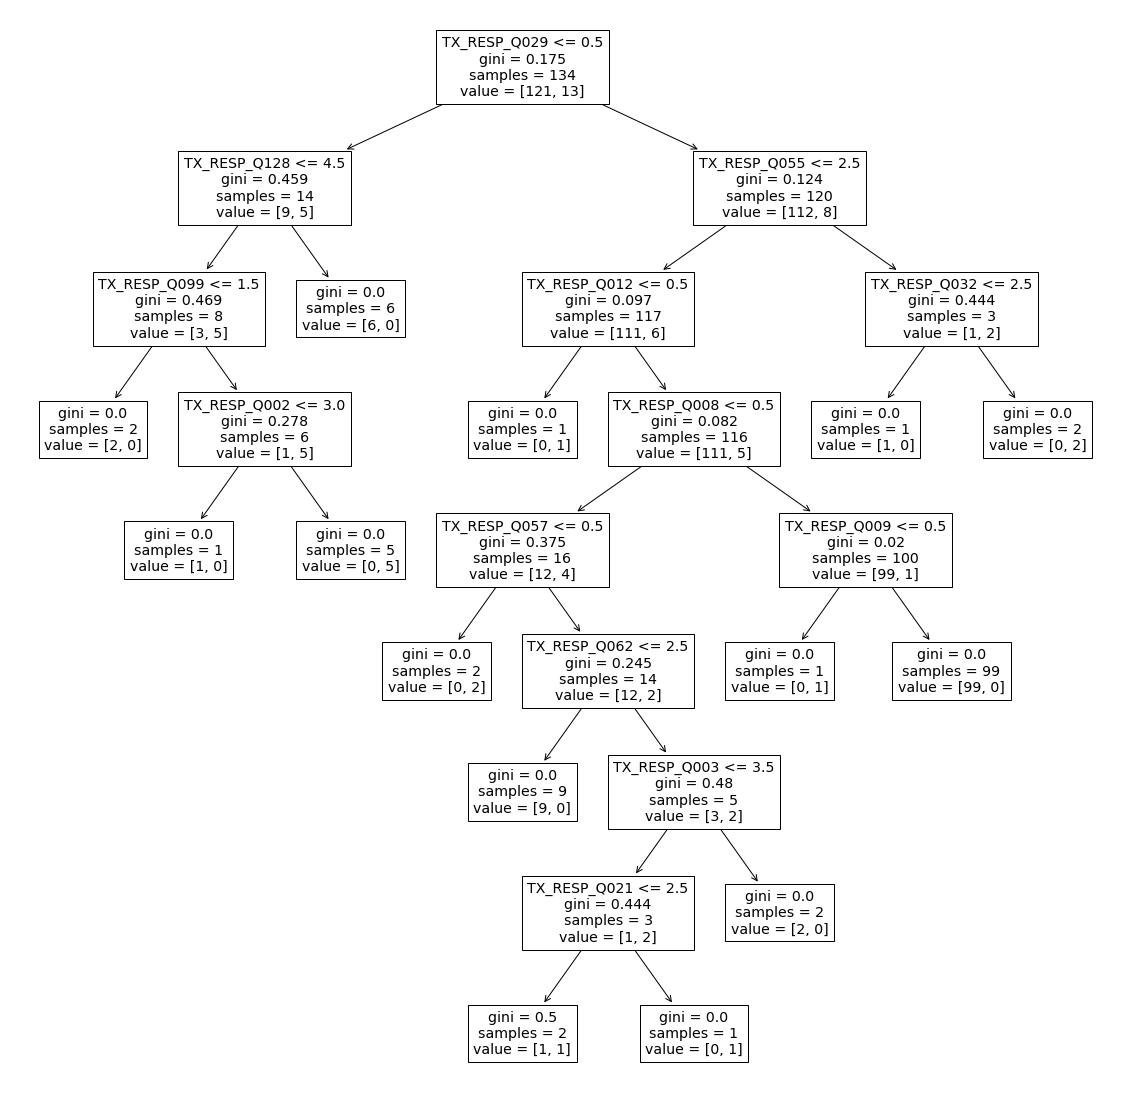

In [ ]:
# mostrando árvore
plt.figure(figsize=(20, 20)) 
plot_tree(classificador,feature_names=X.columns)
plt.show()

['TX_RESP_Q029',
 'TX_RESP_Q128',
 'TX_RESP_Q099',
 'TX_RESP_Q002',
 'TX_RESP_Q055',
 'TX_RESP_Q012',
 'TX_RESP_Q008',
 'TX_RESP_Q057',
 'TX_RESP_Q062',
 'TX_RESP_Q003',
 'TX_RESP_Q021',
 'TX_RESP_Q009',
 'TX_RESP_Q032']

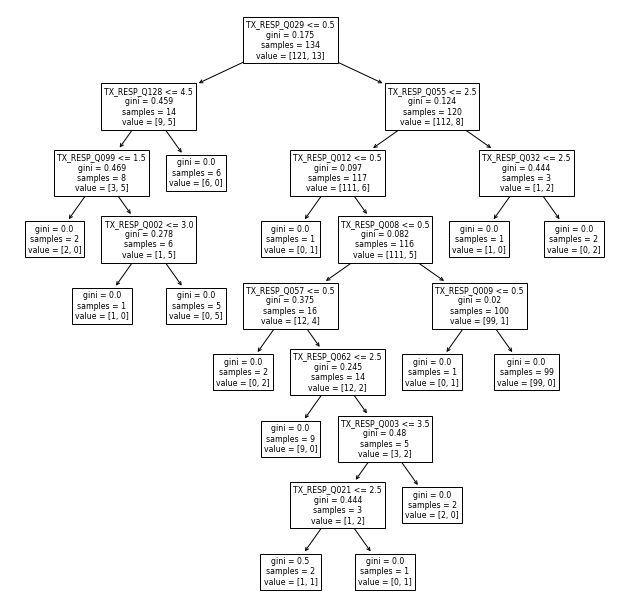

In [ ]:
# script para pegar as features selecionadas para a árvore
questoes = []
for informacoes in plot_tree(classificador,feature_names=X.columns):
  no = str(informacoes).split()[2].replace("'", '')
  if no[0] == 'T':
    questoes.append(no)
questoes

In [ ]:
# mostrando questões escolhidas
for coluna in questoes:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q029
------------------------------
AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ UTILIZA NESTA ESCOLA COM RELAÇÃO AOS SEGUINTES ELEMENTOS: - Acessibilidade
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q128
------------------------------
INDIQUE A FREQUÊNCIA COM QUE VOCÊ DESENVOLVE AS SEGUINTES PRÁTICAS PEDAGÓGICAS NESTA TURMA: - Experimentar diferentes ações (coletar informações, recortar, explorar, manipular etc.) para resolver problemas
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q099
------------------------------
INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM RELAÇÃO AOS SEGUINTES TEMAS ENVOLVENDO SEUS(SUAS) ALUNOS(AS) NESTA ESCOLA: - Interessam-se pela disciplina que leciono
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=
TX_RESP_Q002
------------------------------
Há quantos anos você trabalha como professor (a)?
=-==-==-==-==-==-==-==-==-==-=

=-==-==-==-==-==-==-==-==-==-=


In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in questoes:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

,questão,descrição,A,B,C,D,E,F,G
28,TX_RESP_Q029,AVALIE AS CONDIÇÕES DA SALA DE AULA QUE VOCÊ U...,Inadequado.,Pouco adequado.,Razoavelmente adequado.,Adequado.,NaN,NaN,NaN
28,TX_RESP_Q029,NaN,20,19,41,112,0,0,0
127,TX_RESP_Q128,INDIQUE A FREQUÊNCIA COM QUE VOCÊ DESENVOLVE A...,Nunca.,Uma vez por ano.,De 3 a 4 vezes ao ano.,Mensalmente.,Semanalmente.,Diariamente.,NaN
127,TX_RESP_Q128,NaN,0,0,2,24,102,64,0
98,TX_RESP_Q099,INDIQUE O QUANTO VOCÊ CONCORDA OU DISCORDA EM ...,Discordo fortemente.,Discordo.,Concordo.,Concordo fortemente.,NaN,NaN,NaN
98,TX_RESP_Q099,NaN,2,10,170,10,0,0,0
1,TX_RESP_Q002,Há quantos anos você trabalha como professor (a)?,Meu primeiro ano.,1-2 anos.,3-5 anos.,6-10 anos.,11-15 anos.,16-20 anos.,Mais de 20 anos.
1,TX_RESP_Q002,NaN,7,8,9,29,38,36,65
54,TX_RESP_Q055,DENTRE AS ATIVIDADES FORMATIVAS LISTADAS ABAIX...,Nenhuma.,Uma.,Duas.,Três ou mais.,NaN,NaN,NaN
54,TX_RESP_Q055,NaN,139,29,19,5,0,0,0


In [ ]:
# salvando resultados
questoes_selecionadas.append(questoes)

## Wrapper Forward Selection

Fontes:

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-wrapper-methods-5bb6d99b1274

Irei usar a métrica F1-score junto com Random Forest para avaliar o Wrapper Forward.

In [ ]:
# separando X e y
X = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
y = dados_filtrados['classe']

### Random Forest

In [ ]:
# cria o forward selection e seus parâmetros
forward_selection = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=15, # serão selecionados 15 questões (número arbitrário)
           forward=True,  # estratégia forward
           scoring='f1', # usarei f1  score como métrica
           cv=4# folders de cross validation para evitar viés
           )

NameError: ignored

In [ ]:
# treinando forward 
forward_selection = forward_selection.fit(X, y)

In [ ]:
# printando as features selecionadas
selected_features = X.columns[list(forward_selection.k_feature_idx_)]
print(selected_features)

# printando o f1-escore final
print(forward_selection.k_score_)

In [ ]:
# mostrando questões escolhidas
for coluna in selected_features:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in selected_features:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

In [ ]:
# passando selecionados para lista
questoes_selecionadas.append(list(selected_features))

### Naive Bayes

In [ ]:
# cria o forward selection e seus parâmetros
forward_selection = SequentialFeatureSelector(GaussianNB(), 
           k_features=15, # serão selecionados 15 questões (número arbitrário)
           forward=True,  # estratégia forward
           scoring='f1', # usarei f1  score como métrica
           cv=4# folders de cross validation para evitar viés
           )

In [ ]:
# treinando forward 
forward_selection = forward_selection.fit(X, y)

In [ ]:
# printando as features selecionadas
selected_features = X.columns[list(forward_selection.k_feature_idx_)]
print(selected_features)

# printando o f1-escore final
print(forward_selection.k_score_)

In [ ]:
# mostrando questões escolhidas
for coluna in selected_features:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in selected_features:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

In [ ]:
# passando selecionados para lista
questoes_selecionadas.append(list(selected_features))

## Relief Feature Selection

https://medium.com/@yashdagli98/feature-selection-using-relief-algorithms-with-python-example-3c2006e18f83

https://www.sciencedirect.com/science/article/pii/S1532046418301400#b0255

https://centerforgov.gitbooks.io/benchmarking/content/Proxy.html

https://epistasislab.github.io/scikit-rebate/using/

In [ ]:
# Biblioteca usada para Relief

!pip install skrebate

In [ ]:
# importando relief 
from skrebate import ReliefF

In [ ]:
# separando X e y
X = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
y = dados_filtrados['classe']

In [ ]:
# configurando relief para selecionar 15 features analisando 200 neighbors
relief = ReliefF(n_features_to_select=15, n_neighbors=1.0)

In [ ]:
# selecionando as 15 melhores features com Relief
selecionados_relief = relief.fit_transform(X.to_numpy(), y.to_numpy())

In [ ]:
# script para selecionar as questões que batem com as features selecionadas pelo relief

questoes  = []
valores = [[]for c in range(len(selecionados_relief[0]))] # separando listas para armazenar as respostas dispersas da saída da função ReliefF

# transforma o formato dos dados de (192,  15) para (15, 192), fica mais fácil de analisar
for linha in selecionados_relief:
  for coluna in range(len(linha)):
      valor = linha[coluna]
      valores[coluna].append(valor)

# compara os dados com os valores das questões, se forem iguais, seleciona a questão
for alternativas in valores:
  for questao in X.columns:
    comparacao = alternativas == X[questao].to_list()
    if comparacao is True:
      questoes.append(questao)


questoes

In [ ]:
# mostrando questões escolhidas
for coluna in questoes:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in questoes:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

In [ ]:
# passando selecionados para lista
questoes_selecionadas.append(list(questoes))

## QuiQuadrado

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1

In [ ]:
# separando X e y
X = dados_filtrados.drop(columns=['ID_LOCALIZACAO', 'ID_SERIE', 'IDEB2019', 'classe'])
y = dados_filtrados['classe']

In [ ]:
# preparando teste QuiQuadrado para selecionar as 15 melhores features
qui_test = SelectKBest(score_func=chi2, k=15)

In [ ]:
# fazendo teste QuiQuadrado
fit = qui_test.fit(X, y)
fit.scores_

In [ ]:
# selecionando os 15 melhores resultados
selecionados = qui_test.fit_transform(X, y)

In [ ]:
# printando resultados com dimensão (192, 15)
selecionados

In [ ]:
# script para selecionar as questões que batem com as features selecionadas pelo relief

questoes = []
valores = [[]for c in range(len(selecionados[0]))] # separando listas para armazenar as respostas dispersas da saída da função ReliefF

# transforma o formato dos dados de (192,  15) para (15, 192), fica mais fácil de analisar
for linha in selecionados:
  for coluna in range(len(linha)):
      valor = linha[coluna]
      valores[coluna].append(valor)

# compara os dados com os valores das questões, se forem iguais, seleciona a questão
for alternativas in valores:
  for questao in X.columns:
    comparacao = alternativas == X[questao].to_list()
    if comparacao is True:
      questoes.append(questao)


questoes

In [ ]:
# mostrando questões escolhidas
for coluna in questoes:
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

In [ ]:
# mostrando tabela com informações das questões escolhidas
resultados = []
for coluna in questoes:
  resultados.append(pegar_informacoes_questao(coluna))
  resultados.append(questoes_contagem[questoes_contagem['questão'] == coluna])
pd.concat(resultados)

In [ ]:
# passando selecionados para lista
questoes_selecionadas.append(list(questoes))

## Merge

In [ ]:
# mostrando quantidade de técnicas de questões selecionadas
len(questoes_selecionadas)

In [ ]:
# script para contar quantas vezes determinada questão apareceu
pontuacao = dict()
for tecnica in questoes_selecionadas:
  for questao in tecnica:
    if questao not in pontuacao:
      pontuacao[questao] = 0
    pontuacao[questao] += 1 
pontuacao

In [ ]:
# passando valores para tupla
# fazendo isso é possível a ordenação dos valors

questoes = []
for questao in pontuacao:
  questoes.append((questao, pontuacao[questao]))

# mostrando  as 10 primeiras questoes
questoes[:10]

In [ ]:
pontuacao

In [ ]:
# ordenando questões por pontuação
questoes = shell_sort(questoes)
questoes.reverse()
questoes

In [ ]:
# mostrando as questões selecionadas
for questao in questoes:
  if questao[1] < 3:
    break
  coluna = questao[0]
  print('=-='*10)
  print(coluna)
  print('---'*10)
  print(list(pegar_informacoes_questao(coluna)['descrição'])[0])
  print('=-='*10)
  print()

In [ ]:
# pegando features selecionadas
feature_selecionadas = []
for questao in questoes:
  if questao[1] < 3: 
    break
  feature_selecionadas.append(questao[0])
feature_selecionadas

In [ ]:
atributos = [questao[0].split('_')[-1][1:] for questao in questoes]
pontos = [questao[1] for questao in questoes]

plt.figure(figsize=(32,9))
plt.bar(atributos, pontos)
plt.ylabel('Frequência dos melhores resultados')
plt.xlabel('Atributos')
plt.grid(True)
plt.show()


# Criando nova base de dados

In [ ]:
# mostrando features para nova base de dados
feature_selecionadas

In [ ]:
# mostrando novo dataframe
novos_dados = dados_filtrados[feature_selecionadas + ['classe']]
novos_dados.head()

Os dados parecem extremamente desbalanceados (problema de classificação binária pesando muito pra uma classe) isso pode atrapalhar na construção dos modelos (como errar estatísticas de recall e precision score). Dados assim podem dar a sensação de false bom desempenho, tendo em vista que se os dados tem, por exemplo, 90% das instâncias de um tipo de classe e os outros 10% de outra, basta o modelo apontar todas as instâncias como sendo das de 90%, fazendo isso a acurácia vai ser de 90% e isso está completamente errado.

In [ ]:
novos_dados.to_csv('novos_dados.csv', index=False)

In [ ]:

novos_dados.head()

# Lendo novos dados (para facilitar)

In [ ]:
novos_dados.to_csv(pasta + 'novos_dados.csv', index=False)

# Analisando novos dados

In [ ]:
# verificando se classes estão balanceadas

classes = novos_dados.groupby(by=['classe'])['classe'].count()

plt.bar(['ruim', 'bom'], [classes[0], classes[1]])
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

print('ruim: {} | bom: {}'.format(classes[0], classes[1]))



As classes estão extremamente desbalanceadas, mais ou menos 88% de diferença entre a classe ruim e bom.

Classes desbalanceadas podem comprometer o resultado dos algoritmos, podendo ocorrer desde resultados ilusoriamente bons a totalmente ruins.

Possíveis soluções para desbalanceamento de dados:

*   Triplicar o número de instâncias da classe bom.
*   Deixar a classe ruim com o mesmo número de instâncias que a bom após trilicar.



# Balanceando dados

In [ ]:
# separando dados

inst_ruins = novos_dados[novos_dados.classe == 0]
inst_boas = novos_dados[novos_dados.classe == 1]

X = novos_dados.drop(columns=['classe'])
y = novos_dados.classe

X_all = dados_filtrados.drop(columns=['classe', 'ID_LOCALIZACAO', 'ID_SERIE',])
y_all = dados_filtrados.classe

In [ ]:
print('Número de instâncias com ideb insatisfatório:', len(inst_ruins))
print('Número de instâncias com ideb satisfatório:', len(inst_boas))

In [ ]:
# balanceando dados selecionados
X_balanceado, y_balanceado = SMOTE().fit_resample(X, y)

In [ ]:
# balanceando dadados todos
X_all_balanceado, y_all_balanceado = SMOTE().fit_resample(X_all, y_all)

In [ ]:
# Script para juntar em um dataframe os dados que foram balanceados
dados_balanceados = []
for i in range(len(y_balanceado)):
  linha = list(X_balanceado[i])
  linha.append(y_balanceado[i])
  dados_balanceados.append(linha)
dados_balanceados = pd.DataFrame(dados_balanceados, columns=novos_dados.columns)
dados_balanceados.head()

In [ ]:
dados_balanceados.shape

In [ ]:
# Script para juntar em um dataframe os dados que foram balanceados todos
dados_all_balanceados = []
for i in range(len(y_all_balanceado)):
  linha = list(X_all_balanceado[i])
  linha.append(y_all_balanceado[i])
  dados_all_balanceados.append(linha)
dados_all_balanceados = pd.DataFrame(dados_all_balanceados, columns=dados_filtrados.columns[2:])
dados_all_balanceados.head()

In [ ]:
dados_filtrados.columns

In [ ]:
dados_all_balanceados.shape

In [ ]:
# mostrando que as classes estão balanceadas

classes = dados_balanceados.groupby(by=['classe'])['classe'].count()

plt.bar(['ruim', 'bom'], [classes[0], classes[1]])
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

print('ruim: {} | bom: {}'.format(classes[0], classes[1]))


# Testando modelos (features selecionadas)

In [ ]:
# preparando função para retorno de métricas de teste

def moodel_test(data, model):
  results = {
      'Acurácia': accuracy_score(data,model),
      'Precisão': precision_score(data, model),
      'Recall': recall_score(data, model),
      'F1-Score': f1_score(data,model),
  }
  return results

## Preparando dados

In [ ]:
X = dados_balanceados.drop(columns=['classe'])
y = dados_balanceados['classe']

In [ ]:
# 30% dos dados serão para teste 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.head()

In [ ]:
y_train

## Random Forest

Radom Forest consiste em um número de Árvores de Decisão que operam em conjunto. Cada árvore individual na floresta exibe uma previsão de classe, e a classe com mais votos torna-se a previsão feita pelo modelo.

In [ ]:
# definindo e treinando random forest com 150 árvores
floresta = RandomForestClassifier(n_estimators=150)
floresta.fit(X_train,y_train)

In [ ]:
# calculando o score da random forest
floresta.score(X_train, y_train)

Usando dados para teste

In [ ]:
# realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

Avaliando modelo

https://stats.stackexchange.com/questions/8025/what-are-correct-values-for-precision-and-recall-when-the-denominators-equal-0

In [ ]:
results_floresta = moodel_test(y_test, clf_floresta)

for metrica in results_floresta:
  print(f'{metrica}: {results_floresta[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,clf_floresta)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Árvore de decisão (J48)

Uma árvore de decisão é uml algoritmo que usa um modelo semelhante a uma árvore e suas possíveis consequências, incluindo resultados de eventos fortuitos, custos de recursos e utilidade. É uma maneira de exibir um algoritmo que contém apenas instruções de controle condicional. 

In [ ]:
# definindo modelo de árvore de decisão 
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

In [ ]:
results_arvore = moodel_test(y_test, pred_arvore)

for metrica in results_arvore:
  print(f'{metrica}: {results_arvore[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_arvore)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## SVM

O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. 

In [ ]:
# definindo modelo SVM

svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [ ]:
results_svm = moodel_test(y_test, pred_svm)

for metrica in results_svm:
  print(f'{metrica}: {results_svm[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_svm)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Naive Bayes

O algoritmo “Naive Bayes” é um classificador probabilístico muito utilizado em machine learning. Baseado no “Teorema de Bayes”, o modelo foi criado por um matemático inglês, e também ministro presibiteriano, chamado Thomas Bayes (1701 – 1761) para tentar provar a existência de Deus.

In [ ]:
# definindo modelo Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

In [ ]:
results_gnb = moodel_test(y_test, pred_gnb)

for metrica in results_gnb:
  print(f'{metrica}: {results_gnb[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Nearest Neighbors Classification (IBK)

Nearest Neighbors Classification é um tipo de aprendizagem baseada em instância ou aprendizagem não generalizante: ela não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento fornecidos. A classificação é calculada a partir de um voto de maioria simples dos vizinhos mais próximos de cada ponto: um ponto de consulta é atribuído à classe de dados que tem o maior número de representantes nos vizinhos mais próximos do ponto. 

In [ ]:
# definindo modelo

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred_knc = knc.predict(X_test)

In [ ]:
results_knc = moodel_test(y_test, pred_knc)

for metrica in results_knc:
  print(f'{metrica}: {results_knc[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## OneR

https://www.programmersought.com/article/1245627604/

In [ ]:
# baixando biblioteca
!pip install pip install git+git://github.com/rasbt/mlxtend.git

In [ ]:
# atualizando biblioteca
!pip install mlxtend --upgrade --no-deps

In [ ]:
# importando OneR 
from mlxtend.classifier.oner import OneRClassifier

In [ ]:
# treinando e classificando com oner
oner = OneRClassifier()
oner.fit(X_train.to_numpy(),y_train.to_numpy())
pred_oner = oner.predict(X_test.to_numpy())

In [ ]:
results_oner= moodel_test(y_test, pred_oner)

for metrica in results_oner:
  print(f'{metrica}: {results_oner[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_oner)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## JRip

In [ ]:
# instalando pacotes de regras para JRIp
!pip install wittgenstein

In [ ]:
# importando biblioteca para JRip
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
jrip = lw.RIPPER()
jrip.fit(X_train, y_train)
pred_jrip = jrip.predict(X_test)

In [ ]:
results_jrip = moodel_test(y_test, pred_jrip)

for metrica in results_jrip:
  print(f'{metrica}: {results_jrip[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_jrip)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## REPTree

https://qastack.com.br/datascience/196/algorithm-for-generating-classification-rules

In [ ]:
# instalando pacotes de regras para REPTRee
!pip install wittgenstein

In [ ]:
# importando biblioteca para JRip
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
reptree = lw.IREP()
reptree.fit(X_train, y_train)
pred_reptree = reptree.predict(X_test)

In [ ]:
results_reptree = moodel_test(y_test, pred_reptree)

for metrica in results_reptree:
  print(f'{metrica}: {results_reptree[metrica]}')

In [ ]:
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_reptree)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Comparando resultados

- Renomaer modelos
- Usar apenas os modelos selecionados no artigo:
NaiveBayes
IBK
LibSVM
RandomForest
REPTree
OneR
J48
JRip


In [ ]:
# separando os resultados

labels = ['Floresta', 'J48', 'SVM', 'NaiveBayes', 'IBK', 'OneR', 'JRip', 'REPTRee']
results_modelos = [results_floresta, results_arvore, results_svm, results_gnb,
                   results_knc, results_oner, results_jrip, results_reptree]

acuracia = [modelo['Acurácia'] for modelo in results_modelos]
precisao = [modelo['Precisão'] for modelo in results_modelos]
recall = [modelo['Recall'] for modelo in results_modelos]
f1 = [modelo['F1-Score'] for modelo in results_modelos]

### Comparando acurácia, precisão e f1-score

In [ ]:
# ajustando o tamanho das figuras
plt.rcParams["figure.figsize"] = (8.0, 6.0)

In [ ]:
# comparando acurácia

plt.bar(labels, acuracia)
plt.ylabel('Valor')
plt.title('Classes')
plt.title('Acurácia')
plt.grid(True)
plt.show()

In [ ]:
# comparando precisão

plt.bar(labels, precisao)
plt.ylabel('Valor')
plt.title('Classes')
plt.title('Precisão')
plt.grid(True)
plt.show()

In [ ]:
# comparando recall

plt.bar(labels, recall)
plt.ylabel('Valor')
plt.title('Classes')
plt.title('Recall')
plt.grid(True)
plt.show()

In [ ]:
# comparando f1-score

plt.bar(labels, f1)
plt.ylabel('Valor')
plt.title('Classes')
plt.title('F1-score')
plt.grid(True)
plt.show()

# Friedman e Nemenyi

In [ ]:
# classes para analisar modelos

def get_mean_for_scores(resultados):
  acuracia, precisao, recall = [], [], []
  scores = []
  metricas = [acuracia, precisao, recall]
  c = 0
  for resultado in range(len(resultados)):
    for fold in resultados[resultado]:
      metricas[c].append(sum(fold)/len(fold))
    scores.append(sum(metricas[c])/len(metricas[c]))
  return scores

def cross_validation_for_analyses(modelo, dados):
  resultado = []
  for times in range(30):
    dados = dados.sample(frac=1)
    X = dados.drop(columns=['classe'])
    y = dados['classe']
    X = X.to_numpy()
    y = y.to_numpy()
    values = cross_val_score(modelo,X,y,cv=10)
    #if len(values)  != 5:
      #print(values)
    resultado.append(sum(values)/len(values))
  return {'acurácia': resultado, 'precisão': [], 'recall': []}

# Testando modelos (features selecionadas)

In [ ]:
# preparando função para retorno de métricas de teste

def moodel_test(data, model):
  results = {
      'Acurácia': accuracy_score(data,model),
      'Precisão': precision_score(data, model),
      'Recall': recall_score(data, model),
      'F1-Score': f1_score(data,model),
  }
  return results

## Preparando dados

In [ ]:
X = dados_balanceados.drop(columns=['classe'])
y = dados_balanceados['classe']

In [ ]:
# 30% dos dados serão para teste 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.head()

In [ ]:
y_train

## Random Forest

Radom Forest consiste em um número de Árvores de Decisão que operam em conjunto. Cada árvore individual na floresta exibe uma previsão de classe, e a classe com mais votos torna-se a previsão feita pelo modelo.

In [ ]:
# definindo e treinando random forest com 150 árvores
floresta = RandomForestClassifier(n_estimators=150)
clf_floresta = cross_validation_for_analyses(floresta, dados_balanceados)

Avaliando modelo

https://stats.stackexchange.com/questions/8025/what-are-correct-values-for-precision-and-recall-when-the-denominators-equal-0

In [ ]:
results_floresta = clf_floresta
print(results_floresta['acurácia'])

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,clf_floresta)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Árvore de decisão

Uma árvore de decisão é uml algoritmo que usa um modelo semelhante a uma árvore e suas possíveis consequências, incluindo resultados de eventos fortuitos, custos de recursos e utilidade. É uma maneira de exibir um algoritmo que contém apenas instruções de controle condicional. 

In [ ]:
# definindo modelo de árvore de decisão 
arvore = DecisionTreeClassifier()
pred_arvore = cross_validation_for_analyses(arvore, dados_balanceados)

In [ ]:
results_arvore = pred_arvore
print(results_arvore['acurácia'])

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_arvore)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## SVM

O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. 

In [ ]:
# definindo modelo SVM

svm = SVC()
svm.fit(X_train, y_train)
pred_svm =  cross_validation_for_analyses(svm, dados_balanceados)

In [ ]:
results_svm = pred_svm
print(results_svm['acurácia'])


In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_svm)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Naive Bayes

O algoritmo “Naive Bayes” é um classificador probabilístico muito utilizado em machine learning. Baseado no “Teorema de Bayes”, o modelo foi criado por um matemático inglês, e também ministro presibiteriano, chamado Thomas Bayes (1701 – 1761) para tentar provar a existência de Deus.

In [ ]:
# definindo modelo Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = cross_validation_for_analyses(svm,dados_balanceados)

In [ ]:
results_gnb = pred_gnb

for metrica in results_gnb:
  print(f'{metrica}: {results_gnb[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Nearest Neighbors Classification (IBK)

Nearest Neighbors Classification é um tipo de aprendizagem baseada em instância ou aprendizagem não generalizante: ela não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento fornecidos. A classificação é calculada a partir de um voto de maioria simples dos vizinhos mais próximos de cada ponto: um ponto de consulta é atribuído à classe de dados que tem o maior número de representantes nos vizinhos mais próximos do ponto. 

In [ ]:
# definindo modelo

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred_knc = cross_validation_for_analyses(knc, dados_balanceados)

In [ ]:
results_knc = pred_knc

for metrica in results_knc:
  print(f'{metrica}: {results_knc[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## OneR

https://www.programmersought.com/article/1245627604/

In [ ]:
# baixando biblioteca
!pip install pip install git+git://github.com/rasbt/mlxtend.git

In [ ]:
# atualizando biblioteca
!pip install mlxtend --upgrade --no-deps

In [ ]:
# importando OneR 
from mlxtend.classifier.oner import OneRClassifier

In [ ]:
# treinando e classificando com oner
oner = OneRClassifier()
pred_oner = cross_validation_for_analyses(oner, dados_balanceados)

In [ ]:
results_oner= pred_oner

for metrica in results_oner:
  print(f'{metrica}: {results_oner[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_oner)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## JRip

In [ ]:
# instalando pacotes de regras para JRIp
!pip install wittgenstein

In [ ]:
# importando biblioteca para JRip
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
jrip = lw.RIPPER()
pred_jrip = cross_validation_for_analyses(jrip, dados_balanceados)

In [ ]:
results_jrip = pred_jrip

for metrica in results_jrip:
  print(f'{metrica}: {results_jrip[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_jrip)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## REPTree

https://qastack.com.br/datascience/196/algorithm-for-generating-classification-rules

In [ ]:
# instalando pacotes de regras para REPTRee
!pip install wittgenstein

In [ ]:
# importando biblioteca para reptree
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
reptree = lw.IREP()
pred_reptree = cross_validation_for_analyses(reptree, dados_balanceados)

In [ ]:
results_reptree = pred_reptree

for metrica in results_reptree:
  print(f'{metrica}: {results_reptree[metrica]}')

# Testando modelos (todas)

In [ ]:
# preparando função para retorno de métricas de teste

def moodel_test(data, model):
  results = {
      'Acurácia': accuracy_score(data,model),
      'Precisão': precision_score(data, model),
      'Recall': recall_score(data, model),
      'F1-Score': f1_score(data,model),
  }
  return results

In [ ]:
dados_all_balanceados = dados_all_balanceados.drop(columns=['IDEB2019'])
dados_all_balanceados.head()

## Preparando dados

In [ ]:
x = X_all = dados_all_balanceados.drop(columns=['classe'])
y = y_all = dados_all_balanceados['classe']

In [ ]:
# 30% dos dados serão para teste 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.head()

In [ ]:
y_train

## Random Forest

Radom Forest consiste em um número de Árvores de Decisão que operam em conjunto. Cada árvore individual na floresta exibe uma previsão de classe, e a classe com mais votos torna-se a previsão feita pelo modelo.

In [ ]:
# definindo e treinando random forest com 150 árvores
floresta = RandomForestClassifier(n_estimators=150)
clf_floresta = cross_validation_for_analyses(floresta, dados_all_balanceados)

Avaliando modelo

https://stats.stackexchange.com/questions/8025/what-are-correct-values-for-precision-and-recall-when-the-denominators-equal-0

In [ ]:
results_floresta = clf_floresta

for metrica in results_floresta:
  print(f'{metrica}: {results_floresta[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,clf_floresta)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Árvore de decisão

Uma árvore de decisão é uml algoritmo que usa um modelo semelhante a uma árvore e suas possíveis consequências, incluindo resultados de eventos fortuitos, custos de recursos e utilidade. É uma maneira de exibir um algoritmo que contém apenas instruções de controle condicional. 

In [ ]:
# definindo modelo de árvore de decisão 
arvore = DecisionTreeClassifier()
pred_arvore = cross_validation_for_analyses(arvore, dados_all_balanceados)

In [ ]:
results_arvore = pred_arvore

for metrica in results_arvore:
  print(f'{metrica}: {results_arvore[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_arvore)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## SVM

O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. 

In [ ]:
# definindo modelo SVM

svm = SVC()
svm.fit(X_train, y_train)
pred_svm =  cross_validation_for_analyses(svm, dados_all_balanceados)

In [ ]:
results_svm = pred_svm
for metrica in results_svm:
  print(f'{metrica}: {results_svm[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_svm)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Naive Bayes

O algoritmo “Naive Bayes” é um classificador probabilístico muito utilizado em machine learning. Baseado no “Teorema de Bayes”, o modelo foi criado por um matemático inglês, e também ministro presibiteriano, chamado Thomas Bayes (1701 – 1761) para tentar provar a existência de Deus.

In [ ]:
# definindo modelo Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = cross_validation_for_analyses(svm, dados_all_balanceados)

In [ ]:
results_gnb = pred_gnb

for metrica in results_gnb:
  print(f'{metrica}: {results_gnb[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## Nearest Neighbors Classification (IBK)

Nearest Neighbors Classification é um tipo de aprendizagem baseada em instância ou aprendizagem não generalizante: ela não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento fornecidos. A classificação é calculada a partir de um voto de maioria simples dos vizinhos mais próximos de cada ponto: um ponto de consulta é atribuído à classe de dados que tem o maior número de representantes nos vizinhos mais próximos do ponto. 

In [ ]:
# definindo modelo

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred_knc = cross_validation_for_analyses(knc, dados_all_balanceados)

In [ ]:
results_knc = pred_knc

for metrica in results_knc:
  print(f'{metrica}: {results_knc[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_gnb)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## OneR

https://www.programmersought.com/article/1245627604/

In [ ]:
# baixando biblioteca
!pip install pip install git+git://github.com/rasbt/mlxtend.git

In [ ]:
# atualizando biblioteca
!pip install mlxtend --upgrade --no-deps

In [ ]:
# importando OneR 
from mlxtend.classifier.oner import OneRClassifier

In [ ]:
# treinando e classificando com oner
oner = OneRClassifier()
pred_oner = cross_validation_for_analyses(oner, dados_all_balanceados)

In [ ]:
results_oner= pred_oner

for metrica in results_oner:
  print(f'{metrica}: {results_oner[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_oner)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## JRip

In [ ]:
# instalando pacotes de regras para JRIp
!pip install wittgenstein

In [ ]:
# importando biblioteca para JRip
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
jrip = lw.RIPPER()
pred_jrip = cross_validation_for_analyses(jrip, dados_all_balanceados)

In [ ]:
results_jrip = pred_jrip

for metrica in results_jrip:
  print(f'{metrica}: {results_jrip[metrica]}')

In [ ]:
"""
# plotando curva ROC
fpr, tpr, _ = roc_curve(y_test,pred_jrip)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
"""

## REPTree

https://qastack.com.br/datascience/196/algorithm-for-generating-classification-rules

In [ ]:
# instalando pacotes de regras para REPTRee
!pip install wittgenstein

In [ ]:
# importando biblioteca para JRip
import wittgenstein as lw

In [ ]:
# treinando e classificando com JRip
reptree = lw.IREP()
pred_reptree = cross_validation_for_analyses(reptree, dados_all_balanceados)

In [ ]:
results_reptree = pred_reptree

for metrica in results_reptree:
  print(f'{metrica}: {results_reptree[metrica]}')

## Teste

In [ ]:
dados_all_balanceados.columns

In [ ]:
dados_balanceados.columns

In [ ]:
dados_all_balanceados.shape

In [ ]:
dados_balanceados.shape